In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import re

import matplotlib.pyplot as plt 
import matplotlib as mpl 
%matplotlib notebook
%pylab

import seaborn as sns
sns.set()
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('clean_tweets_tesla.csv')
df.head()

,text,id,query,created_at,hashtags,symbols,retweet_count,favorite_count,in_reply_to_user_id,label,text_clean,Polarity,vader_polarity,sentiment
0,All here ... https://t.co/0fp1zEeCOL,1404696800674684928,tesla,2021-06-15 07:06:29,[],[],0,0,NaN,NaN,NaN,0.00,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral
1,The 2021 AAA Car Guide overall winner is the 2...,1405264931528888326,tesla,2021-06-16 20:44:02,"[{'text': 'AAA', 'indices': [141, 145]}, {'tex...",[],0,0,NaN,NaN,aaa car guid overal winner model long rang fin...,0.15,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",positive
2,$AABB Company Info https://t.co/RMtaHNJQ47 \n#...,1405169048174923781,tesla,2021-06-16 14:23:02,"[{'text': 'wsj', 'indices': [44, 48]}, {'text'...","[{'text': 'AABB', 'indices': [0, 5]}]",1,1,NaN,NaN,aabb compani info wsj nytim busi reuter ih ub ...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,$AABB News https://t.co/xAraNDdjPq \n#wsj #nyt...,1404773688164114435,tesla,2021-06-15 12:12:01,"[{'text': 'wsj', 'indices': [36, 40]}, {'text'...","[{'text': 'AABB', 'indices': [0, 5]}]",0,0,NaN,NaN,aabb news wsj nytim busi reuter ih ub stock po...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,$AABB Posted https://t.co/PnNhp8zx7T \n#wsj #n...,1405153694530916354,tesla,2021-06-16 13:22:01,"[{'text': 'wsj', 'indices': [38, 42]}, {'text'...","[{'text': 'AABB', 'indices': [0, 5]}]",0,0,NaN,NaN,aabb post wsj nytim busi reuter ih ub stock po...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


In [4]:
df.shape

(4722, 14)

In [5]:
df.nunique()

text                   4722
id                     4722
query                     1
created_at             4624
hashtags               1467
symbols                 374
retweet_count            57
favorite_count          174
in_reply_to_user_id       0
label                     0
text_clean             4721
Polarity                560
vader_polarity         1800
sentiment                 3
dtype: int64

In [6]:
# Drop duplicates
df.drop_duplicates(subset ='text_clean', keep = 'first', inplace = True) 
df.reset_index(drop=True, inplace=True)
df.shape

(4722, 14)

In [7]:
df['text_clean'].replace('', np.nan, inplace=True)
df.dropna(subset=['text_clean'], inplace=True)
df.reset_index(inplace=True)
df.shape

(4721, 15)

In [8]:
df.head()

,index,text,id,query,created_at,hashtags,symbols,retweet_count,favorite_count,in_reply_to_user_id,label,text_clean,Polarity,vader_polarity,sentiment
0,1,The 2021 AAA Car Guide overall winner is the 2...,1405264931528888326,tesla,2021-06-16 20:44:02,"[{'text': 'AAA', 'indices': [141, 145]}, {'tex...",[],0,0,NaN,NaN,aaa car guid overal winner model long rang fin...,0.15,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",positive
1,2,$AABB Company Info https://t.co/RMtaHNJQ47 \n#...,1405169048174923781,tesla,2021-06-16 14:23:02,"[{'text': 'wsj', 'indices': [44, 48]}, {'text'...","[{'text': 'AABB', 'indices': [0, 5]}]",1,1,NaN,NaN,aabb compani info wsj nytim busi reuter ih ub ...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,3,$AABB News https://t.co/xAraNDdjPq \n#wsj #nyt...,1404773688164114435,tesla,2021-06-15 12:12:01,"[{'text': 'wsj', 'indices': [36, 40]}, {'text'...","[{'text': 'AABB', 'indices': [0, 5]}]",0,0,NaN,NaN,aabb news wsj nytim busi reuter ih ub stock po...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,4,$AABB Posted https://t.co/PnNhp8zx7T \n#wsj #n...,1405153694530916354,tesla,2021-06-16 13:22:01,"[{'text': 'wsj', 'indices': [38, 42]}, {'text'...","[{'text': 'AABB', 'indices': [0, 5]}]",0,0,NaN,NaN,aabb post wsj nytim busi reuter ih ub stock po...,0.00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,5,"This is absolutely awesome, thank you @Tesla! ...",1405152380728057863,tesla,2021-06-16 13:16:48,[],[],1,13,NaN,NaN,absolut awesom thank opportun work think best ...,1.00,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",positive


In [9]:
df['sentiment'].value_counts(normalize=True)

neutral     0.487397
positive    0.403304
negative    0.109299
Name: sentiment, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
indices = df.index.values 

# Split data into training and test sets
X = df['text_clean']
y = df['sentiment']
X_train, X_test, indices_train, indices_test = train_test_split(
    X, 
    indices,
    test_size=0.2,
    stratify=y,
    random_state=42)

y_train, y_test = df['sentiment'][indices_train], df['sentiment'][indices_test]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3776,), (945,), (3776,), (945,))

In [11]:
y_train.value_counts(normalize=True)

neutral     0.487288
positive    0.403337
negative    0.109375
Name: sentiment, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

neutral     0.487831
positive    0.403175
negative    0.108995
Name: sentiment, dtype: float64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Fit the CountVectorizer to the training data
vect = TfidfVectorizer(min_df=3, ngram_range=(1,3), max_df = .8).fit(X_train)
#vect = CountVectorizer(min_df=5, ngram_range=(1,2), max_df = .8).fit(X_train)

import pickle
pickle.dump(vect, open("vectorizer.pickle", "wb"))

# transform the training and testing data
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

X_train_vect, X_test_vect

(<3776x4713 sparse matrix of type '<class 'numpy.float64'>'
 	with 51401 stored elements in Compressed Sparse Row format>,
 <945x4713 sparse matrix of type '<class 'numpy.float64'>'
 	with 11440 stored elements in Compressed Sparse Row format>)

We have more features than training examples, feature selection will be necessary - LASSO could be very useful here, especially because it wiould also reduce multi-collinearity generated during vectorization with n-grams

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [15]:
def plot_dim_red_2D(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = 'PCA decomposition'  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=n_components)
        title = 't-SNE decomposition' 
        
    else:
        return 'Error'
    
    # Fit and transform the features
    if (model == 'PCA'):
        principal_components = mod.fit_transform(features)
        # Put them into a dataframe
        df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
        
    elif (model == 'TSNE'):
        principal_components = mod.fit_transform(features)
        # Put them into a dataframe
        df_features = pd.DataFrame(data=principal_components,
                     columns=['TSNE1', 'TSNE2'])
    
    else:
        return 'Error'
        
    
 
    
    # Paste each row's label and its meaning
    
    df_full = pd.concat([df_features, labels], axis=1)
    df_full['sentiment'] = df_full.iloc[:, -1]


    # Plot
    if (model == 'PCA'):
        plt.figure(figsize=(8,6))
        sns.scatterplot(x='PC1',
                        y='PC2',
                        hue='sentiment', 
                        data=df_full,
                        alpha=.7)
        
    elif (model == 'TSNE'):
        plt.figure(figsize=(8,6))
        sns.scatterplot(x='TSNE1',
                        y='TSNE2',
                        hue='sentiment', 
                        data=df_full,
                        alpha=.7)

<IPython.core.display.Javascript object>


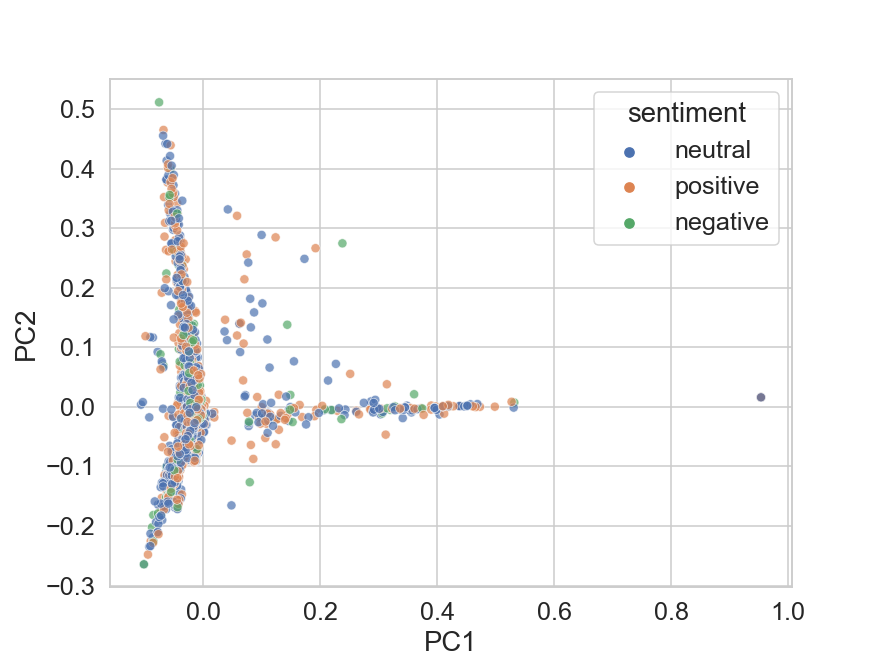

In [16]:
plot_dim_red_2D('PCA', 
             features=X_train_vect.todense(), 
             labels=y_train,
             n_components=2)

<IPython.core.display.Javascript object>


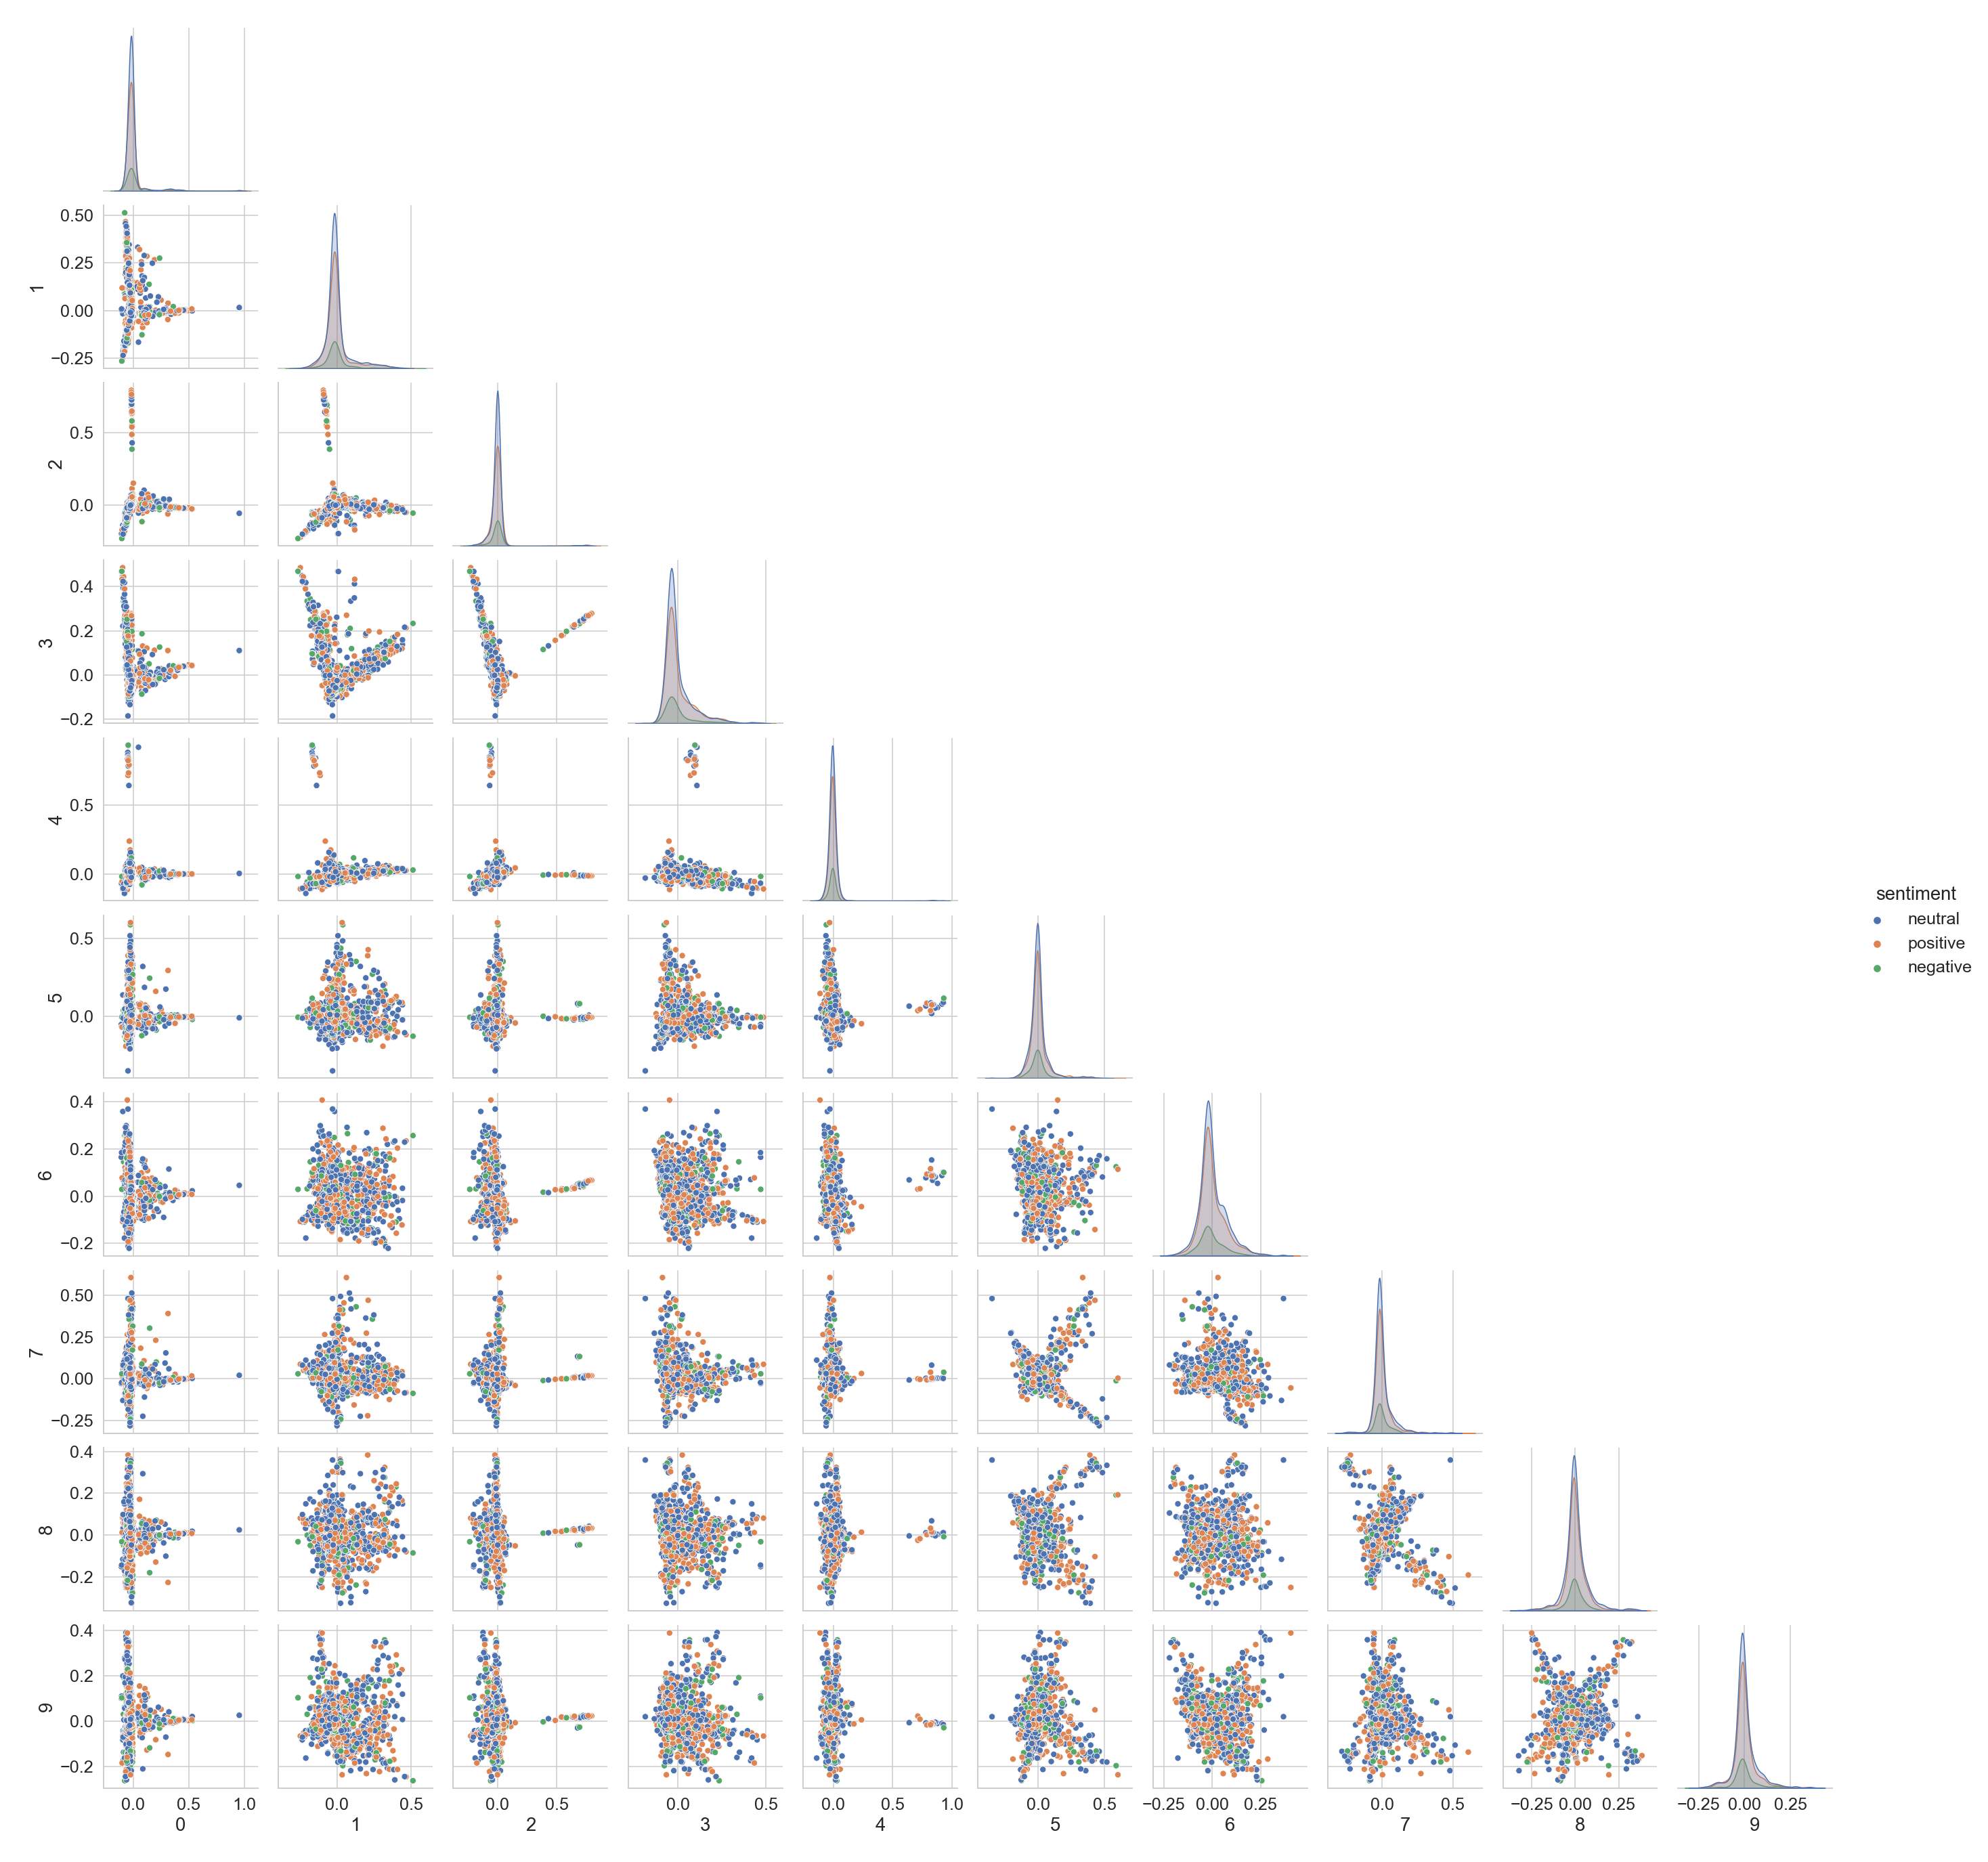

In [17]:
pca = PCA(n_components=100)
principal_components = pca.fit_transform(X_train_vect.todense())
df_pca = pd.DataFrame(data=principal_components)
pca_feat_lables_df = pd.concat([df_pca.iloc[:,:10], y_train], axis=1, sort=False)

sns.pairplot(pca_feat_lables_df, kind='scatter', hue='sentiment', corner=True)

<IPython.core.display.Javascript object>


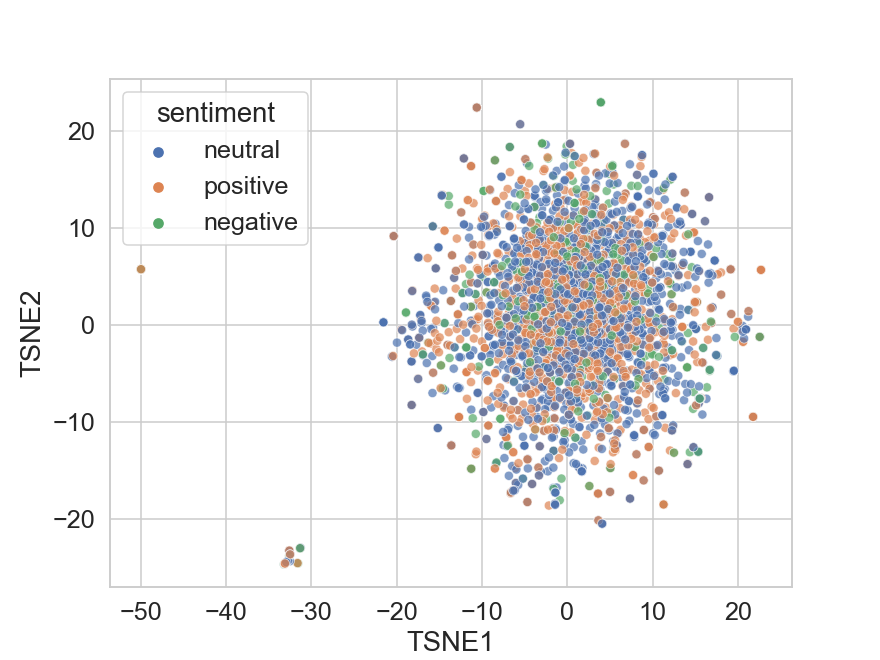

In [18]:
plot_dim_red_2D('TSNE', 
            features=X_train_vect.todense(), 
             labels=y_train,
             n_components=2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, matthews_corrcoef

# logistic regression model
lr = LogisticRegression(solver='liblinear', penalty = 'l1', max_iter=1000)

# define pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', vect), ('clf', lr)])

# define regolarization parameter C for tuning
C_exponent = np.logspace(-1, 1, 20)
C = 10**C_exponent
parameters = {
    'vectorizer__min_df':[3, 5, 7],
    'vectorizer__max_df':[.5, .7, .8, .9,],
    'vectorizer__ngram_range':[(1,2), (1,3), (1,5)],
    'clf__C':C}

from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

scorer = make_scorer(f1_score, average = 'weighted')

# perform grid search on C and cross-validation with 5 folds
grid_lr = GridSearchCV(pipe, 
                       parameters,
                       scoring=scorer,
                       cv=5, 
                       return_train_score=True, 
                       n_jobs=-1,
                       verbose=3)
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  7.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(max_df=0.8, min_df=3,
                                                        ngram_range=(1, 3))),
                                       ('clf',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='l1',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'clf__C': array([1.25892541e+00, 1.34099605e+00, 1.45337496e+00, 1.61032601e+00,
       1.83512263e+00, 2.16761341e+00, 2.67999041e+00, 3.51204020e+00,
       4....0, 1.34535808e+01, 2.74441566e+01,
       6.80739123e+01, 2.16631431e+02, 9.47003189e+02, 6.20426288e+03,
       6.80660014e+04, 1.44039668e+06, 7.04043841e+07, 1.00000000e+10]),
                         'vectorizer__max_df': [0.5, 0.7, 0.8, 0.9],
                         'vectori

In [32]:
grid_lr.best_score_

0.9381332329351547

In [33]:
# get optimized model
optimized_lr = grid_lr.best_estimator_
optimized_lr

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(C=68.07391230283874, max_iter=1000,
                                    penalty='l1', solver='liblinear'))])

In [34]:
pickle.dump(optimized_lr, open("optimized_lr.pickle", "wb"))

<IPython.core.display.Javascript object>


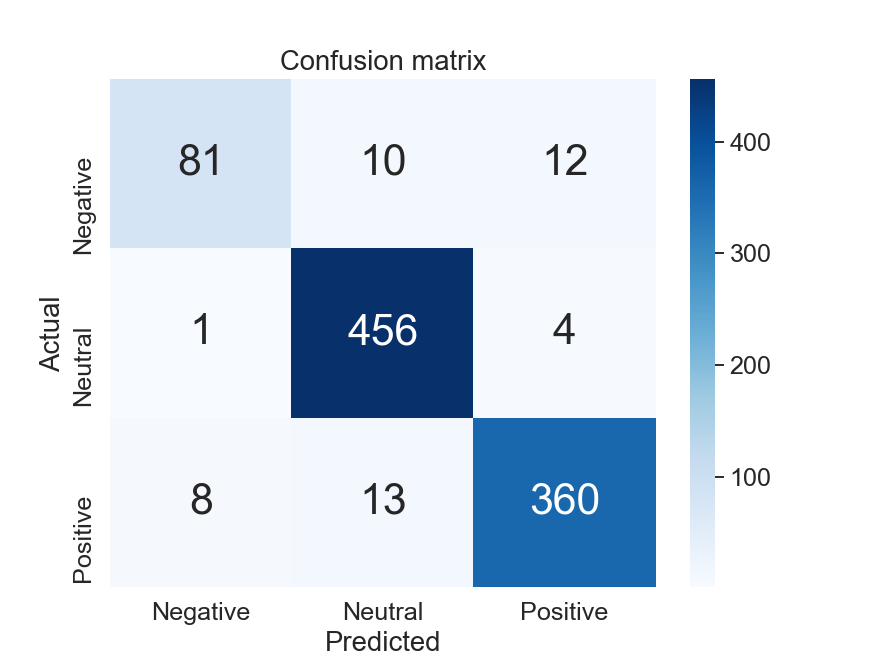

Text(0.5, 1.0, 'Confusion matrix')

In [35]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef


# Predict the transformed test documents
y_pred = optimized_lr.predict(X_test)
y_pred_proba = optimized_lr.predict_proba(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

lables = {'Negative': 0, 'Neutral':1, 'Positive': 2} 

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            annot_kws={'size':28},
            fmt="d",
            xticklabels=lables.keys(), 
            yticklabels=lables.keys(),
            cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')

In [36]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.79      0.84       103
     neutral       0.95      0.99      0.97       461
    positive       0.96      0.94      0.95       381

    accuracy                           0.95       945
   macro avg       0.94      0.91      0.92       945
weighted avg       0.95      0.95      0.95       945



In [37]:
matthews_corrcoef(y_test, y_pred)

0.9132184010786054

In [38]:
# generate list of features names and coefficient found by the model 
train_df = pd.DataFrame(optimized_lr.named_steps['vectorizer'].fit_transform(X_train).todense(), 
                        columns=sorted(optimized_lr.named_steps['vectorizer'].vocabulary_))
names = train_df.columns
coeff = optimized_lr.named_steps['clf'].coef_[0]
# Create a zip object from two lists
zip_ = zip(names, coeff)
# Create a dictionary from zip object
dict_names_coeff = dict(zip_)

In [39]:
non_zero_coeff={}
for key, value in dict_names_coeff.items():
    if value != 0:
        non_zero_coeff[key] = value
        
import operator
dict(sorted(non_zero_coeff.items(), key=operator.itemgetter(1)))

{'love': -47.68480719058357,
 'right': -33.05042404612595,
 'top': -29.66692434665281,
 'best': -27.866328237785755,
 'success': -26.870694606943477,
 'lol': -23.328695576339598,
 'lmao': -22.652260552846254,
 'kind': -22.132324353196196,
 'nice': -21.482477975568216,
 'support': -20.679854155436082,
 'none': -19.990978441972704,
 'fun': -16.83060742661033,
 'subscrib': -15.913464233919326,
 'super': -14.046772892574793,
 'perfect': -12.549369398680334,
 'surpris': -12.547811535594004,
 'rich': -11.45253992883119,
 'tsla tsla': -11.276319226668356,
 'good': -10.869528425540512,
 'gold': -10.775555440404217,
 'action': -10.64700561427443,
 'pretti': -10.01518080288239,
 'factori': -9.87817561938913,
 'strong': -9.856715894984319,
 'hit': -9.586085081666887,
 'better': -9.156283513206809,
 'brilliant': -9.040614974728868,
 'batteri': -8.813794810510469,
 'butt': -8.809462070710358,
 'norway': -7.873468497573872,
 'higher': -7.842448239783622,
 'daili': -7.227325289035224,
 'noth': -6.964

In [40]:
len(non_zero_coeff)

530

<IPython.core.display.Javascript object>


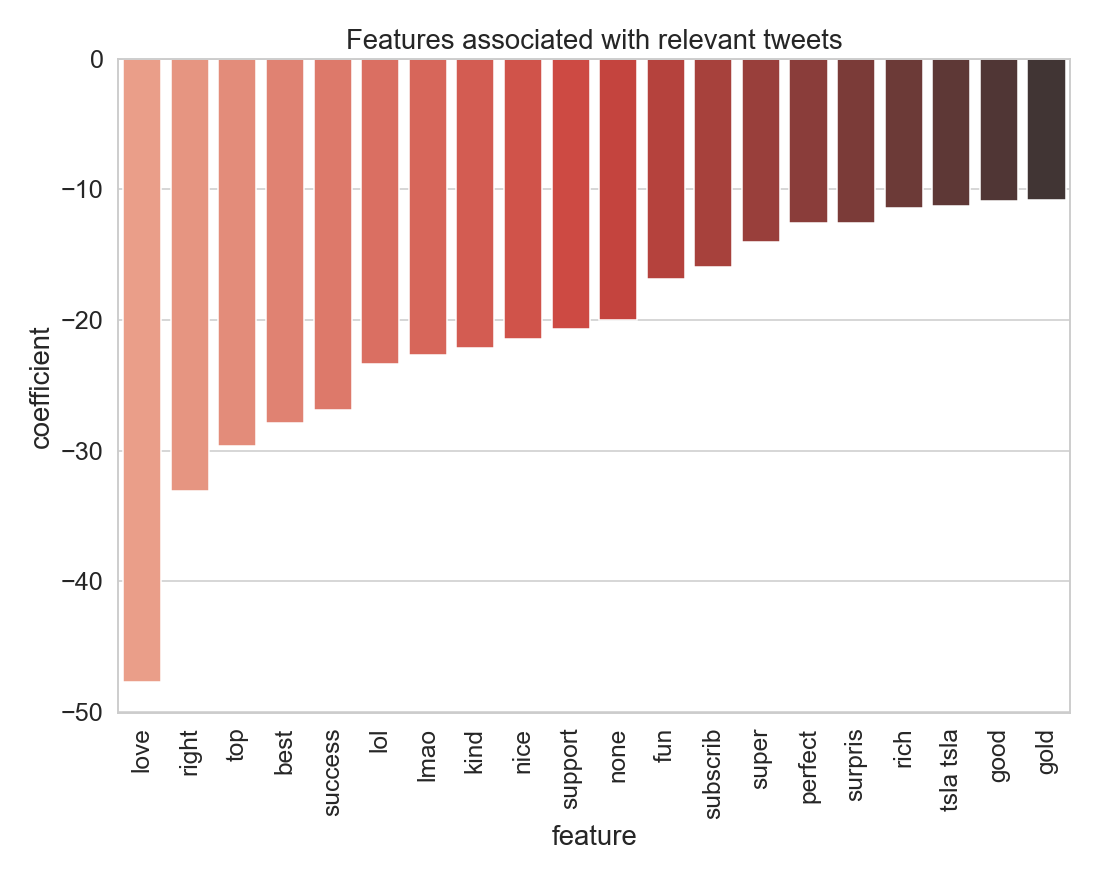

In [41]:
# sort coefficients and generate histogram for positive features
sorted_d_pos = dict(sorted(dict_names_coeff.items(), key=operator.itemgetter(1))[:20])
sorted_d_pos = pd.DataFrame(data=sorted_d_pos, index=[0]).T.reset_index()
sorted_d_pos.rename(columns={'index': 'feature', 0: 'coefficient'}, inplace=True)

plt.figure(figsize=(10,8))
plot = sns.barplot(x='feature', y='coefficient', data=sorted_d_pos, palette='Reds_d')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size=16)
plt.title('Features associated with relevant tweets')
plt.tight_layout()

<IPython.core.display.Javascript object>


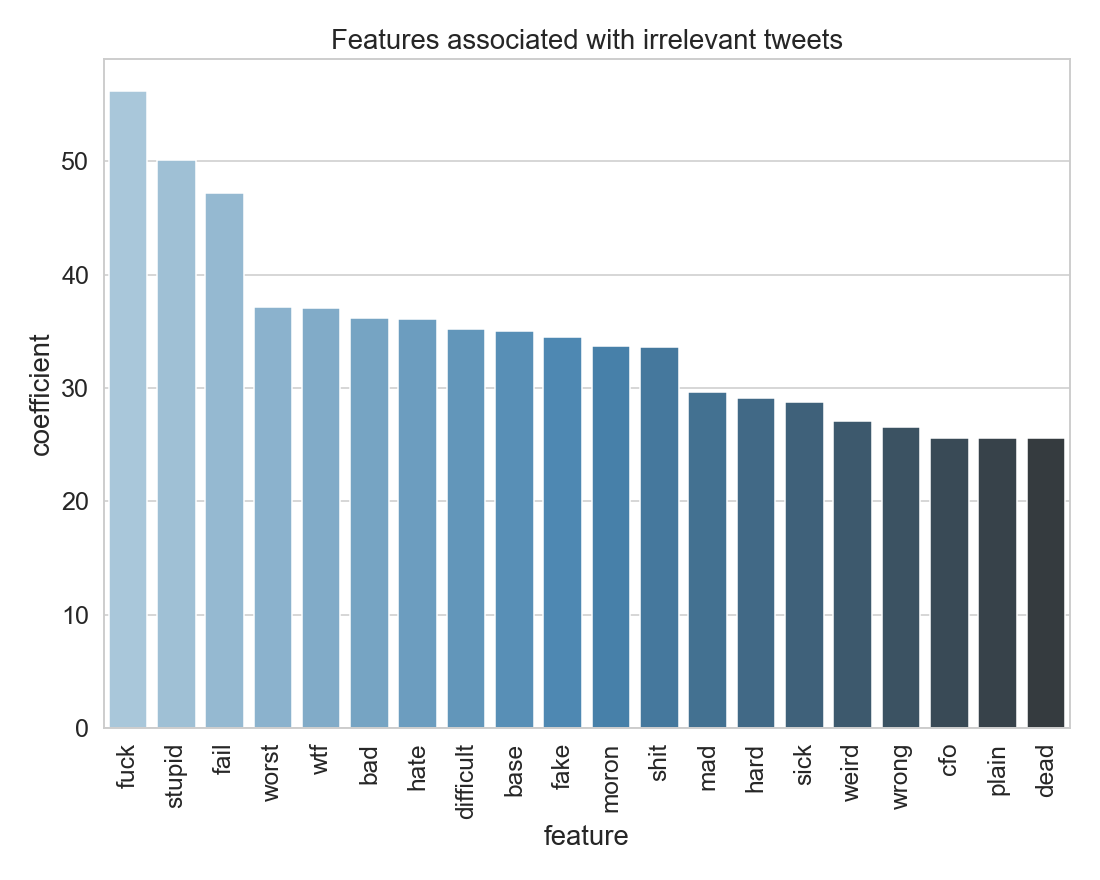

In [42]:
# sort coefficients and generate histogram for negative features
sorted_d_neg = dict(sorted(dict_names_coeff.items(), key=operator.itemgetter(1), reverse=True)[:20])
sorted_d_neg = pd.DataFrame(data=sorted_d_neg, index=[0]).T.reset_index()
sorted_d_neg.rename(columns={'index': 'feature', 0: 'coefficient'}, inplace=True)

plt.figure(figsize=(10,8))
plot = sns.barplot(x='feature', y='coefficient', data=sorted_d_neg, palette='Blues_d')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size=16)
plt.title('Features associated with irrelevant tweets')
plt.tight_layout()

In [58]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss
from sklearn.metrics import SCORERS

In [59]:
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, score, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 20)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, scoring=score,
                       n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8,6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'd-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    
    plt.ylim(ylim)
   
    grid(b=True, which='major', linestyle='-')
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel('f1-score')
    plt.title(title)
    plt.show()

<IPython.core.display.Javascript object>


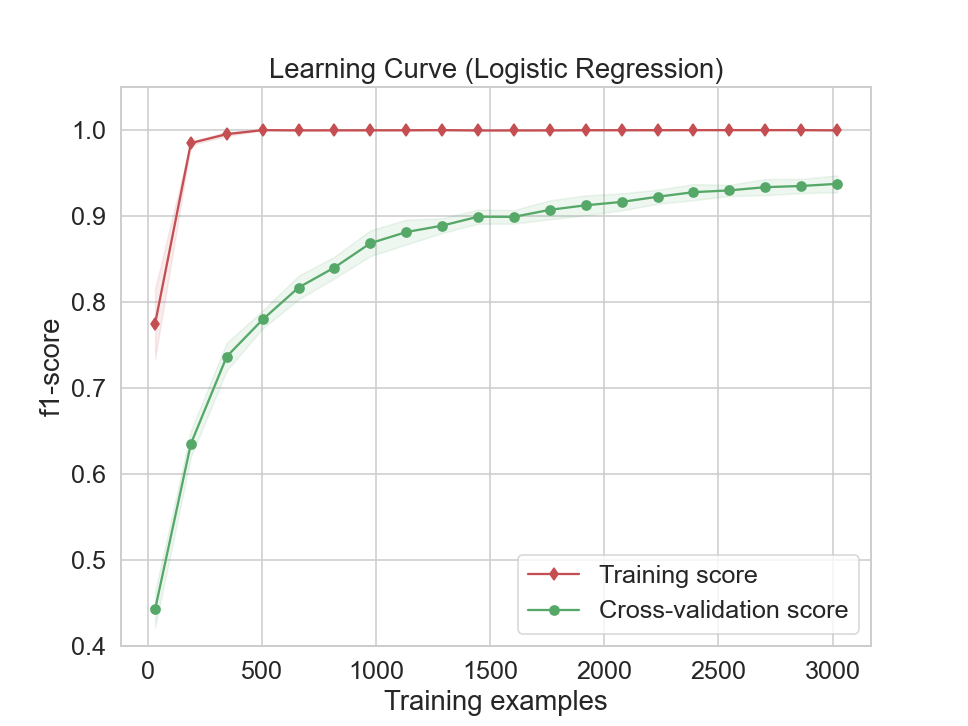

In [60]:
title = "Learning Curve (Logistic Regression)"
plots = plot_learning_curve(optimized_lr, title, X_train, y_train, 
                            scorer, ylim=(0.4, 1.05), cv=5, n_jobs=-1)